In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import itertools
%matplotlib inline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df_days=pd.read_csv('/content/bugs_collab_data_Set_30_days.csv',index_col=False)
df_months=pd.read_csv('/content/bugs_collab_data_Set_months.csv',index_col=False)
df_months=df_months.dropna()
df_days=df_days.dropna()

In [ ]:
project_Names=['Hibernate ORM' , 'Wicket' , 'ZooKeeper' , 'GeoTools' , 'GeoServer']
for proj_Name in  project_Names:
  df=df_months.loc[df_months['project_name']==proj_Name,]
  print("collaborators",proj_Name,df.commentor_id.nunique() )
  print("reports",proj_Name,df.developer_id.nunique() )
# df=df_days.loc[df_days['project_name']=='ZooKeeper',]
# df=df_months.loc[df_days['project_name']=='GeoTools',]
# df=df_months.loc[df_days['project_name']=='GeoServer',]
# df=df_months.loc[df_days['project_name']=='Wicket',]
# print("collaborators",df.commentor_id.nunique() )

# df.developer_id.unique()

# df.report_id.nunique()
# print("unique developers",df.developer_id.nunique)
# print("unique collaborators",df.commentor_id.nunique)


collaborators Hibernate ORM 319
reports Hibernate ORM 20
collaborators Wicket 223
reports Wicket 21
collaborators ZooKeeper 98
reports ZooKeeper 51
collaborators GeoTools 89
reports GeoTools 29
collaborators GeoServer 134
reports GeoServer 29


In [ ]:
df_days.head()

,report_id,developer_id,commentor_id,type,project_name,resolution_time
0,75,53,53,Bug,Hibernate Websites,1 day 18:36:21.757
1,75,53,51,Bug,Hibernate Websites,1 day 18:36:21.757
2,75,53,53,Bug,Hibernate Websites,1 day 18:36:21.757
3,75,53,53,Bug,Hibernate Websites,1 day 18:36:21.757
4,79,55,53,Bug,Hibernate Websites,1 day 22:47:38.687


In [ ]:
df_days['commentor_id']=df_days.commentor_id.astype(int)
df_months['commentor_id']=df_months.commentor_id.astype(int)

In [ ]:
### Exploring days Data set with projects that have more then thousand collaborations
# project_names=df_days.project_name.unique()
# for i in project_names:
#   df_1=df_days.loc[df_days['project_name'] ==i ,]
#   print(i,"=",df_1.shape[0])

# Hibernate ORM = 1818 , Wicket = 3286 ,ZooKeeper = 2115 ,GeoTools = 1555 ,GeoServer = 2715

In [ ]:
### Exploring months Data set with projects that have more then thousand collaborations
# months_project_names=df_months.project_name.unique()
# for i in months_project_names:
#   df_1=df_months.loc[df_months['project_name'] ==i ,]
#   print(i,"=",df_1.shape[0])

##  Hibernate ORM = 1548 ,Wicket = 1576 , ZooKeeper = 1980 ,GeoTools = 1015 ,GeoServer = 1847

In [ ]:
### Create Dataframe to store values
# column_names = [ "Project_name","Catagory" ,"Clustering_coeff","Degree","Degree_centrality","Betweennes_centrality","Closeness_Centrality"]
# final_df= pd.DataFrame(columns = column_names)

In [ ]:
# for i in project_names:
#   df_1=df.loc[df['project_name'] ==i ,]
# # df=df.drop(['project_name'],axis=1)
#   print(i,"=",df_1.shape[0])
# project_names=['Zookeeper','Wicket','Hadoop YARN']
# count=0
# project_Names=['Hibernate ORM' , 'Wicket' , 'ZooKeeper' , 'GeoTools' , 'GeoServer']
# for proj_Name in  project_Names:  
#   df1=df_days.loc[df_days['project_name']==proj_Name,]
#   compute_properties_days(proj_Name)
#   # compute_properties_months()

# # df2=df_months.loc[df_months['project_name']=='ZooKeeper',]

In [ ]:
del final_df

In [ ]:

def compute_properties_days(proj_Name):
  global count
  proj_Name=proj_Name
  project_name=[]
  global final_df
  days_connected_comp=[]
## Indicator for combining all dataframe
  count += 1
  bug_issue_collab_graph_days=nx.from_pandas_edgelist(df1,source='commentor_id',target='developer_id',edge_attr='report_id',create_using=nx.DiGraph)
  #print(nx.info(bug_issue_collab_graph_days))

  ## Clustering_coeff
  ## This will tell degree to which collaborators resolving issue of a central developer are connected with each other
  clustering_coeff= [nx.clustering(bug_issue_collab_graph_days,n) for n in bug_issue_collab_graph_days.nodes() ]
  
  ## Degree
  ## This will tell us numbers of developers that are collaborating to resolve issue of a central developer
  degrees = [ bug_issue_collab_graph_days.degree(n) for n in bug_issue_collab_graph_days.nodes()]
  
  ## Degree of developers only 
  ## Degree
  days_developers_degree = [ bug_issue_collab_graph_days.degree(n) for n in df1.developer_id]
  print(days_developers_degree)


  ## Calculate weakly connected component size which tells us size of connected developers using comments with each other
  [(days_connected_comp.append( len(c))) for c in sorted(nx.weakly_connected_components(bug_issue_collab_graph_days))]
  
 
  # ## Degree Centrality
  # ## 
  days_graph_degree_centrality =  nx.degree_centrality(bug_issue_collab_graph_days) 
  days_graph_degree_centrality=list(days_graph_degree_centrality.values())
  
  ## Betweenness Centrality
  ### This will tell us measure of each developer in centrality between  communication of two developers 
  days_graph_betweenness_centrality =  nx.betweenness_centrality(bug_issue_collab_graph_days) 
  days_graph_betweenness_centrality=(days_graph_betweenness_centrality.values())
  
  ## Closseness Centrality
  ## This will tell closeness of a developer in terms of communication with other developers in same project
  days_graph_closeness_centrality =  nx.closeness_centrality(bug_issue_collab_graph_days) 
  days_graph_closeness_centrality=(days_graph_closeness_centrality.values())

  ## Days Graph Eigenvector centrality
  days_graph_eign_centrality =  nx.eigenvector_centrality(bug_issue_collab_graph_days) 
  days_graph_eign_centrality=(days_graph_eign_centrality.values())
  # print(days_graph_eign_centrality)
  
  ### hits Algorithm
  ## Return hubs and authorities values 
  hubs,auth=nx.hits(bug_issue_collab_graph_days)
  ## hubs will represent measure of how many developers interact with one developer interact with a developer to resolve a issue
  # print("hubs", hubs.values())
  # ## authorities will represent measure of how many collobaorators of high quality interact with a developer to resolve a issue
  # print("authorities", auth.values())
  project_name=list(itertools.repeat(proj_Name,len(clustering_coeff)))
  catagory=list(itertools.repeat('Days',len(clustering_coeff)))


  if count==1:
    final_df = pd.DataFrame({
        'Project_name':project_name,
        'Catagory' :catagory,
        'Clustering_coeff' : clustering_coeff,
                                    'Degree' : degrees,
                                    'Degree_centrality' :days_graph_degree_centrality, 
                                    'Betweenness_centrality' :days_graph_betweenness_centrality, 
                                    'Closeness_centrality':days_graph_closeness_centrality,  
                                     'Eigenvector_centrality':days_graph_eign_centrality,
                                     'hubs_values':hubs.values(),
                                     'auth_values':auth.values()
                                   } 
                                    )
    connected_comp_df=pd.DataFrame({'connected_comp':pd.Series(days_connected_comp),'Developers_degree':pd.Series(days_developers_degree)})
    final_df=pd.concat([final_df,connected_comp_df],axis=1)
  else :
    final_df_1= pd.DataFrame({
        'Project_name':project_name,
        'Catagory' :catagory,
        'Clustering_coeff' : clustering_coeff,
                                    'Degree' : degrees,
                                    'Degree_centrality' :days_graph_degree_centrality, 
                                    'Betweenness_centrality' :days_graph_betweenness_centrality, 
                                    'Closeness_centrality':days_graph_closeness_centrality,  
                                    'Eigenvector_centrality':days_graph_eign_centrality,
                                    'hubs_values':hubs.values(),
                                    'auth_values':auth.values()
                                     } 
                                   )
    connected_comp_df=pd.DataFrame({'connected_comp':pd.Series(days_connected_comp),'Developers_degree':pd.Series(days_developers_degree)})
    final_df_1=pd.concat([final_df_1,connected_comp_df],axis=1)
    final_df=pd.concat([final_df,final_df_1])

count=0;
project_Names=['Hibernate ORM' , 'Wicket' , 'ZooKeeper' , 'GeoTools' , 'GeoServer']
for proj_Name in  project_Names:  
  df1=df_days.loc[df_days['project_name']==proj_Name,]
  compute_properties_days(proj_Name)

[44, 44, 44, 44, 44, 25, 25, 25, 25, 44, 44, 44, 44, 131, 44, 44, 3, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 13, 13, 44, 44, 11, 11, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 25, 25, 25, 131, 131, 131, 131, 131, 44, 44, 44, 44, 44, 131, 44, 44, 44, 131, 44, 44, 44, 44, 44, 44, 44, 44, 131, 131, 131, 131, 131, 131, 131, 11, 11, 11, 11, 11, 11, 11, 11, 11, 44, 44, 44, 44, 44, 44, 44, 44, 44, 11, 11, 11, 11, 11, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 131, 131, 131, 131, 131, 131, 44, 44, 44, 44, 44, 131, 131, 131, 44, 44, 44, 44, 44, 44, 44, 11, 11, 11, 11, 131, 131, 131, 131, 3, 131, 131, 131, 131, 25, 25, 25, 131, 131, 25, 25, 25, 25, 25, 44, 44, 44, 44, 44, 44, 44, 44, 25, 44, 44, 44, 44, 25, 25, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 25, 25, 25, 131, 131, 131, 

In [ ]:
print(final_df.connected_comp.dropna())


0    259.0
1      1.0
0    414.0
0    122.0
0    111.0
1      1.0
0    179.0
Name: connected_comp, dtype: float64


In [ ]:
bug_issue_collab_graph_months=nx.from_pandas_edgelist(df2,source='commentor_id',target='developer_id',edge_attr='report_id',create_using=nx.DiGraph)
degrees = [ bug_issue_collab_graph_months.degree(n) for n in bug_issue_collab_graph_months.nodes() if n in df2.developer_id]
print(degrees)

[]


In [ ]:
### Create subgraph for each report for name of projects

### Calculate degrees of each developer

## Degree

final_df.shape

(11489, 12)

In [ ]:
def compute_properties_months(proj_Name):

  proj_Name=proj_Name
  project_name=[]
  global final_df
  months_connected_comp=[]

  bug_issue_collab_graph_months=nx.from_pandas_edgelist(df2,source='commentor_id',target='developer_id',edge_attr='report_id',create_using=nx.DiGraph)


  ## Clustering_coeff
  clustering_coeff= [nx.clustering(bug_issue_collab_graph_months,n) for n in bug_issue_collab_graph_months.nodes() ]
 
  
  ## Degree of all collaborators
  degrees = [ bug_issue_collab_graph_months.degree(n) for n in bug_issue_collab_graph_months.nodes()]
  
  
  ## Degree of developers only 
  ## Degree
  months_developers_degree = [ bug_issue_collab_graph_months.degree(n) for n in df2.developer_id]
  print(months_developers_degree)


  ## Calculate weakly connected component size which tells us size of connected developers using comments with each other
  [(months_connected_comp.append( len(c))) for c in sorted(nx.weakly_connected_components(bug_issue_collab_graph_months))]
  


  ## Degree Centrality
  months_graph_degree_centrality =  nx.degree_centrality(bug_issue_collab_graph_months) 
  months_graph_degree_centrality=list(months_graph_degree_centrality.values())
  
  ## Betweenness Centrality
  months_graph_betweenness_centrality =  nx.betweenness_centrality(bug_issue_collab_graph_months) 
  months_graph_betweenness_centrality=(months_graph_betweenness_centrality.values())
  
  ## Closseness Centrality
  months_graph_closeness_centrality =  nx.closeness_centrality(bug_issue_collab_graph_months) 
  months_graph_closeness_centrality=(months_graph_closeness_centrality.values())

 # Eigenvector Centrality
  months_graph_eigen_centrality =  nx.eigenvector_centrality(bug_issue_collab_graph_months) 
  months_graph_eigen_centrality=(months_graph_eigen_centrality.values())
  # print(months_graph_eigen_centrality)

  ### hits Algorithm
  ### hits Algorithm
  ## Return hubs and authorities values 
  hubs,auth=nx.hits(bug_issue_collab_graph_months)
  # print("hubs" + proj_Name , hubs.values())
  # print("authorities" + proj_Name , auth.values())
  
 

  project_name=list(itertools.repeat(proj_Name,len(clustering_coeff)))
  catagory=list(itertools.repeat('Months',len(clustering_coeff)))

  

  final_df_1= pd.DataFrame({
      'Project_name':project_name,
      'Catagory' :catagory,
      'Clustering_coeff' : clustering_coeff,
                                  'Degree' : degrees,
                                  'Degree_centrality' :months_graph_degree_centrality, 
                                  'Betweenness_centrality' :months_graph_betweenness_centrality, 
                                  'Closeness_centrality':months_graph_closeness_centrality,
                                  'Eigenvector_centrality': months_graph_eigen_centrality ,
                                  'hubs_values': hubs.values(),
                                  'auth_values':auth.values(),
                                  } 
                                  )
  connected_comp_df=pd.DataFrame({'connected_comp':pd.Series(months_connected_comp),'Developers_degree':pd.Series(months_developers_degree)})
  final_df_1=pd.concat([final_df_1,connected_comp_df],axis=1)
  final_df=pd.concat([final_df,final_df_1])




project_Names=['Hibernate ORM' , 'Wicket' , 'ZooKeeper' , 'GeoTools' , 'GeoServer']
for proj_Name in  project_Names:  
  df2=df_months.loc[df_months['project_name']==proj_Name,]
  compute_properties_months(proj_Name)

[3, 29, 29, 29, 29, 29, 153, 153, 153, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 29, 29, 29, 48, 48, 48, 48, 48, 48, 48, 48, 48, 29, 29, 29, 29, 29, 29, 29, 29, 48, 48, 48, 48, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 29, 29, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 153, 153, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 29, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 48, 48, 48, 48, 48, 48, 48, 153, 153, 153

In [ ]:
final_df.head()

,Project_name,Catagory,Clustering_coeff,Degree,Degree_centrality,Betweenness_centrality,Closeness_centrality,Eigenvector_centrality,hubs_values,auth_values,connected_comp,Developers_degree
0,Hibernate ORM,Days,0.00000,1.0,0.003861,0.000000,0.000000,2.439304e-13,0.001369,0.000000,259.0,44
1,Hibernate ORM,Days,0.04259,44.0,0.169884,0.009271,0.433646,3.085032e-01,0.011763,0.076069,1.0,44
2,Hibernate ORM,Days,0.00000,1.0,0.003861,0.000000,0.000000,2.439304e-13,0.000527,0.000000,NaN,44
3,Hibernate ORM,Days,0.05200,25.0,0.096525,0.005524,0.402854,1.910727e-01,0.011056,0.029312,NaN,44
4,Hibernate ORM,Days,0.00000,1.0,0.003861,0.000000,0.000000,2.439304e-13,0.001369,0.000000,NaN,44


In [ ]:
# delfinal_df
print(final_df.shape)
final_df.tail()

(19452, 12)


,Project_name,Catagory,Clustering_coeff,Degree,Degree_centrality,Betweenness_centrality,Closeness_centrality,Eigenvector_centrality,hubs_values,auth_values,connected_comp,Developers_degree
1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [ ]:
final_df.to_csv('bug_resolution_final_dataset_with_connected_component.csv',index=False)

In [ ]:
import seaborn as sns
sns.set() 
import numpy as np

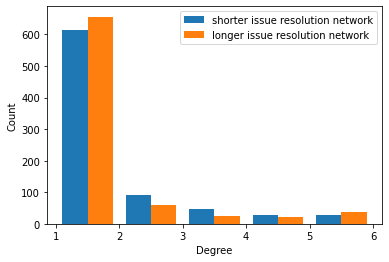

In [ ]:
### Degree Distribution of all collaborators
days_deg=final_df.loc[(final_df['Catagory']=='Days') ]
days_deg=days_deg.sample(872)
months_deg=final_df.loc[(final_df['Catagory']=='Months') ]
# bins=[1,2,3,4,5,6]
plt.hist([days_deg.Degree,months_deg.Degree], bins=[1,2,3,4,5,6]
         ,  label=['shorter issue resolution network', 'longer issue resolution network'])
plt.legend(loc='upper right')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [ ]:
## Degree Distribution of developers who resolved the issue
days_deg.head()

,Project_name,Catagory,Clustering_coeff,Degree,Degree_centrality,Betweenness_centrality,Closeness_centrality,Eigenvector_centrality,hubs_values,auth_values,connected_comp
13,GeoTools,Days,0.0,1,0.009009,0.000000,0.000000,6.383873e-13,0.010471,0.000000,NaN
31,ZooKeeper,Days,0.0,1,0.008264,0.000000,0.000000,1.510317e-12,0.003160,0.000000,NaN
25,GeoServer,Days,0.0,4,0.022472,0.000000,0.400409,9.391437e-02,0.007786,0.011443,NaN
163,GeoServer,Days,0.0,4,0.022472,0.000825,0.005618,1.744724e-08,0.001528,0.000680,NaN
83,GeoTools,Days,0.0,1,0.009009,0.000000,0.000000,6.383873e-13,0.010471,0.000000,NaN


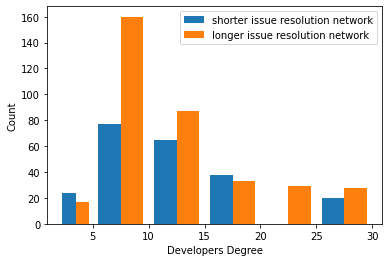

In [ ]:
## Degree Distribution of developers who resolved the issue
final_df.dropna()
plt.hist([days_deg.Developers_degree,months_deg.Developers_degree],  label=['shorter issue resolution network', 'longer issue resolution network'],bins=[2,5,10,15,20,25,30])
plt.legend(loc='upper right')
plt.xlabel('Developers Degree')
plt.ylabel('Count')
plt.show()

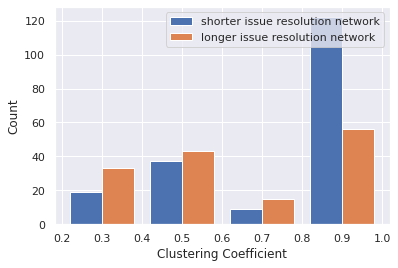

In [ ]:
### Clustering Coefficient

days_deg=final_df.loc[(final_df['Catagory']=='Days') ]
days_deg=days_deg.sample(872)
months_deg=final_df.loc[(final_df['Catagory']=='Months') ]
# bins=[1,2,3,4,5,6]
plt.hist([days_deg.Clustering_coeff,months_deg.Clustering_coeff]
         , label=['shorter issue resolution network', 'longer issue resolution network'] , bins=[0.2,0.4,0.6,0.8,1.0])
plt.legend(loc='upper right')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Count')
plt.show()

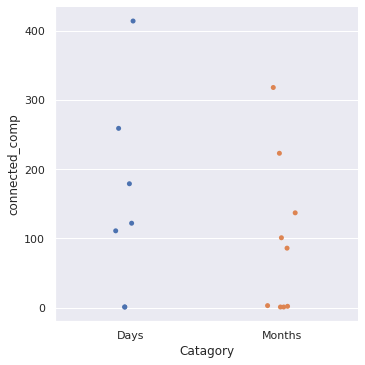

In [ ]:
### Connected_component
final_df.dropna()
sns.catplot(x="Catagory", y="connected_comp",label=['shorter issue resolution network', 'longer issue resolution network'], data=final_df)
# sns.catplot(x="Catagory", y="Betweenness_centrality", data=final_df)
# sns.catplot(x="Catagory", y="Closeness_centrality", data=final_df)
# sns.catplot(x="Catagory", y="hubs_values", data=final_df)
# sns.catplot(x="Catagory", y="auth_values", data=final_df)

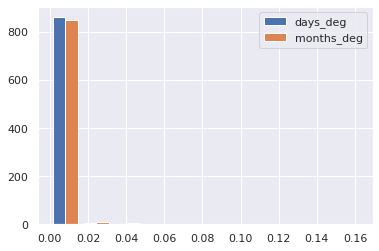

In [ ]:
### Betweenness Centrality

days_deg=final_df.loc[(final_df['Catagory']=='Days') ]
days_deg=days_deg.sample(872)
months_deg=final_df.loc[(final_df['Catagory']=='Months') ]
# bins=[1,2,3,4,5,6]
plt.hist([days_deg.Betweenness_centrality,months_deg.Betweenness_centrality ]
         ,  label=['days_deg', 'months_deg'])
plt.legend(loc='upper right')

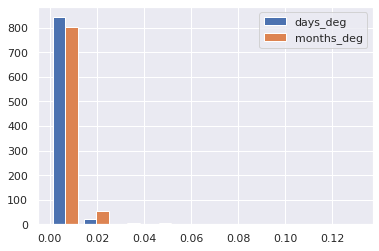

In [ ]:
## Hubs value
days_deg=final_df.loc[(final_df['Catagory']=='Days') ]
days_deg=days_deg.sample(872)
months_deg=final_df.loc[(final_df['Catagory']=='Months') ]
# bins=[1,2,3,4,5,6]
plt.hist([days_deg.hubs_values,months_deg.hubs_values ]
         ,  label=['days_deg', 'months_deg'])
plt.legend(loc='upper right')


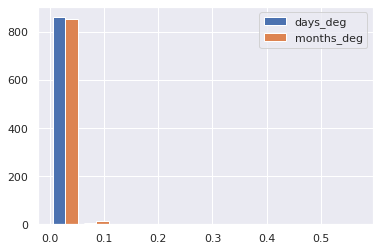

In [ ]:
## Authority


days_deg=final_df.loc[(final_df['Catagory']=='Days') ]
days_deg=days_deg.sample(872)
months_deg=final_df.loc[(final_df['Catagory']=='Months') ]
# bins=[1,2,3,4,5,6]
plt.hist([days_deg.auth_values,months_deg.auth_values ]
         ,  label=['days_deg', 'months_deg'])
plt.legend(loc='upper right')

In [ ]:
bug_issue_collab_graph_days=nx.from_pandas_edgelist(df1,source='commentor_id',target='developer_id',edge_attr='report_id',create_using=nx.DiGraph)

In [ ]:
nx.info(bug_issue_collab_graph_days)

'Name: \nType: DiGraph\nNumber of nodes: 122\nNumber of edges: 329\nAverage in degree:   2.6967\nAverage out degree:   2.6967'

In [ ]:
### Clustering coefficient of all collaborators
### How much they clusterd togather
clustering_coeff= [nx.clustering(bug_issue_collab_graph_days,n) for n in bug_issue_collab_graph_days.nodes() ]
final_df['clustering_coeff']=clustering_coeff
final_df['project_name']='ZooKeeper'
final_df['Catagory']='under one month'
print(clustering_coeff)
print(len(clustering_coeff))

[0.3333333333333333, 0.2457627118644068, 0, 0.037219101123595506, 0, 0.5, 0.20862470862470864, 0.4418604651162791, 1.0, 0, 0.5, 0.30952380952380953, 0.06640181611804767, 0, 0.327027027027027, 1.0, 0.24878048780487805, 1.0, 0, 0, 0.1, 0, 0, 0, 0.05357142857142857, 0, 0.15555555555555556, 0, 0, 0, 0, 0, 0.5, 0, 0.3333333333333333, 0.5, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 0.5, 0.5185185185185185, 0, 1.0, 0, 0.4444444444444444, 0, 1.0, 0.5833333333333334, 1.0, 0, 1.0, 0.3333333333333333, 0, 0, 0, 1.0, 1.0, 0, 0, 0.75, 0.42857142857142855, 1.0, 0, 0.5, 0, 0.5, 0, 0, 1.0, 0.55, 0, 1.0, 1.0, 0.65, 0.5, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0.5, 0, 0, 1.0, 1.0, 0, 0, 0.8653846153846154, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0.1, 0, 0, 1.0, 0]
122


In [ ]:
final_df.head()
final_df.size

732

In [ ]:
## Degree of all collaborators
### How many edges, connections each collaborator have in terms of comment
degrees = [ bug_issue_collab_graph_days.degree(n) for n in bug_issue_collab_graph_days.nodes()]
final_df.degree=degrees
print(degrees)
print(len(degrees))

[85, 30, 5, 43, 42, 8, 72, 1, 7, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 5, 1, 9, 4, 1, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 25, 1, 1, 1, 127, 11, 1, 2, 1, 1, 3, 1, 1, 1, 12, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 36, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 3, 1, 4, 1, 1, 1, 1, 1, 2, 1, 20, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 25, 13, 2, 1, 2, 13, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 8, 1, 2, 2, 3, 8, 1, 1, 1, 2, 1, 1, 2, 1, 20, 1, 1, 1, 3, 1, 1, 2, 1, 6, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 2, 1, 10, 2, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 1, 2, 9, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 102, 1, 27, 1, 6, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 56, 2, 1, 2, 1, 1, 1, 1, 1, 1, 8, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 52, 1, 1, 1, 8, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 11, 1, 16, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1,

In [ ]:
## Degree centrality of all collaborators
## no of developers adjacent to it
days_graph_degree_centrality =  nx.degree_centrality(bug_issue_collab_graph_days) 
final_df.degree_centrality=days_graph_degree_centrality
print(days_graph_degree_centrality.values())
len(days_graph_degree_centrality.values())

dict_values([0.0064452532605398846, 0.002274795268425842, 0.0003791325447376403, 0.0032605398847437065, 0.0031847133757961785, 0.0006066120715802245, 0.00545950864422202, 7.582650894752806e-05, 0.0005307855626326964, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 0.00030330603579011223, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 0.00015165301789505612, 7.582650894752806e-05, 0.00030330603579011223, 7.582650894752806e-05, 0.0003791325447376403, 7.582650894752806e-05, 0.0006824385805277526, 0.00030330603579011223, 7.582650894752806e-05, 0.00030330603579011223, 0.00015165301789505612, 0.00015165301789505612, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 0.00015165301789505612, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.582650894752806e-05, 7.58265089475280

13189

In [ ]:
### Closeness Centrality of all collaborators
days_graph_closeness_centrality =  nx.closeness_centrality(bug_issue_collab_graph_days) 
final_df.closeness_centrality=days_graph_closeness_centrality
print(days_graph_closeness_centrality.values())
len(days_graph_closeness_centrality.values())

dict_values([0.1401001486048944, 0.1290231557442568, 0.12026396543581577, 0.13019429453942563, 0.1288842469097932, 0.11194608390221443, 0.1853053146332131, 0.0, 0.11187097660593535, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.582650894752806e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 7.582650894752806e-05, 0.0, 0.12018196025453146, 0.0, 0.10375499804844224, 0.11190728279325272, 0.0, 0.1118723169238685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11812785978250143, 0.12579362249750914, 0.0, 0.0, 0.0, 0.14745416193237437, 0.12893407719263208, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11687843191808349, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12896435009623236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12903668568477486, 0.0, 0.1117906893985504, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12563959639891828, 0.1281027123289241, 0.0, 0.0, 0.0, 0.12561762345617164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

13189

In [ ]:
### Betweenness centrality of all collaborators
days_graph_betweenness_centrality =  nx.betweenness_centrality(bug_issue_collab_graph_days) 

print(days_graph_betweenness_centrality.values())
len(days_graph_betweenness_centrality.values())

dict_values([0.0, 0.0, 0.0307499154956782, 0.16429692404268675, 0.0, 0.005432420686657976, 0.0, 0.025812448693804606, 0.0, 0.0006277463904582548, 0.0005058187261577092, 0.0735344536191994, 0.0, 0.01244627939543193, 0.0, 0.0014945192911294607, 0.01769037616495243, 0.0, 0.0, 0.0, 0.007764739968129802, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009054034477763291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00013279250567386157, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004370080641267083, 0.0, 0.0, 0.0052151238591916565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0012301414843787725, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003259452411994784, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00015935100680863394, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


119

In [ ]:
### Eccentricity of each collaborator
# sub_graph=nx.strongly_connected_components(bug_issue_collab_graph_daysy
[nx.eccentricity(bug_issue_collab_graph_days,i) for i in bug_issue_collab_graph_days.nodes()]
# for conn_sub_graph in sub_graph:f
#   eccentricity = [ nx.eccentricity(conn_sub_graph,n) for n in bug_issue_collab_graph_days.nodes()]

AttributeError: ignored

In [ ]:
### Diameter , Radius 
# [len(c) for c in sorted(nx.weakly_connected_components(bug_issue_collab_graph_days), key=len, reverse=True)]
# print('diameter',nx.diameter())
# print('radius',nx.radius())


[119]